In [105]:
%%time
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from joblib import dump, load

CPU times: user 173 µs, sys: 37 µs, total: 210 µs
Wall time: 236 µs


In [106]:
%%time
# Read csv file into dataframe
df = pd.read_csv('RosterLinkedInLabel_CornellMW.csv')
#df.info()

CPU times: user 16.9 ms, sys: 4.74 ms, total: 21.6 ms
Wall time: 21.3 ms


In [107]:
#df.drop(columns = ['Unnamed: 0'], inplace=True)

In [108]:
#df.to_csv('CornellW_data.csv', index=False)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 34 columns):
FirstLast         613 non-null object
Criteria          613 non-null object
Year              613 non-null int64
YearsPlayed       613 non-null int64
RosterLink        137 non-null object
Hometown          395 non-null object
HS                392 non-null object
ClassYear         395 non-null object
College           613 non-null object
First             613 non-null object
Gender            613 non-null int64
Last              613 non-null object
MidInit           108 non-null object
MidName           9 non-null object
Name              395 non-null object
RosterYear        395 non-null object
LName             472 non-null object
SearchResult      472 non-null object
Headline          472 non-null object
Location          472 non-null object
Company           454 non-null object
School            472 non-null object
Activites         472 non-null object
fuzz_ratio        472 non-

In [110]:
df.dropna(subset = ['MatchLinkedIn'], inplace=True)
df.set_index('FirstLast', inplace=True)

In [111]:
dfm = df

In [112]:
df = df.select_dtypes(exclude=['object'])

In [113]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, Abedin Sham to Winifred Johnson
Data columns (total 14 columns):
Year              472 non-null int64
YearsPlayed       472 non-null int64
Gender            472 non-null int64
fuzz_ratio        472 non-null float64
fuzz_pratio       472 non-null float64
fuzz_tokensort    472 non-null float64
fuzz_tokenset     472 non-null float64
fuzz_wratio       472 non-null float64
tennis_yn         472 non-null float64
School_yn         472 non-null float64
SameName_yn       472 non-null float64
SameTennis_yn     472 non-null float64
Decade            472 non-null int64
MatchLinkedIn     472 non-null float64
dtypes: float64(10), int64(4)
memory usage: 55.3+ KB


In [115]:
# Define X with selected columns, y as the binary variable to predict
X = df.drop(['MatchLinkedIn'] , axis = 1 ).values
#X = df.drop(['EC_Review','fuzz_wratio', 'fuzz_pratio', 'fuzz_tokensort', 'Decade', 'YearsPlayed'] , axis = 1 ).values
y = df['MatchLinkedIn'].values

In [116]:
#CornellM_Data = dfm

In [117]:
#CornellM_Data.to_csv('CornellM_Data.csv')

In [118]:
# Train, Test, Split to segregate Training from Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [119]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=10))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [30],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['entropy']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Model Parameter: {}".format(rfc.best_params_))
print("Tuned Model Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rfc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
print("F1 score: ", f1_score(y_test , rfc_predict))
print("Precision score: " , precision_score(y_test , rfc_predict))
print("Recall score: " , recall_score(y_test , rfc_predict))
print (classification_report(y_test , rfc_predict))
rfc

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Model Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'entropy', 'rfc__max_depth': 30}
Tuned Model Accuracy: 0.8135593220338984
[[32 12]
 [ 7 67]]
Accuracy score:  0.8389830508474576
F1 score:  0.8758169934640523
Precision score:  0.8481012658227848
Recall score:  0.9054054054054054
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77        44
         1.0       0.85      0.91      0.88        74

    accuracy                           0.84       118
   macro avg       0.83      0.82      0.82       118
weighted avg       0.84      0.84      0.84       118

CPU times: user 63.1 ms, sys: 7.28 ms, total: 70.4 ms
Wall time: 142 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [120]:
df

,Year,YearsPlayed,Gender,fuzz_ratio,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,tennis_yn,School_yn,SameName_yn,SameTennis_yn,Decade,MatchLinkedIn
FirstLast,,,,,,,,,,,,,,
Abedin Sham,2004,2,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2000,1.00
Al Hill,2017,1,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2010,1.00
Alafia Ayeni,2020,3,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2020,1.00
Alex Kim,2005,1,1,76.00,62.00,76.00,76.00,86.00,0.00,1.00,0.00,0.00,2000,1.00
Alex Sidney,2015,4,1,69.00,73.00,71.00,71.00,86.00,1.00,1.00,0.00,1.00,2010,1.00
Alexander Champion,1962,2,1,76.00,69.00,76.00,76.00,76.00,1.00,1.00,0.00,1.00,1960,0.00
Alexander Wilton,2014,2,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2010,1.00
Andrew Dykeman,2018,4,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2010,1.00
Andrew Hong,2006,3,1,100.00,100.00,100.00,100.00,100.00,1.00,1.00,1.00,2.00,2000,1.00


In [121]:
#fig, ax = plt.subplots( 1,1, figsize=(20,10))
#df.drop(columns = ['Unnamed: 0'], inplace=True)
#df2 = df
#df2.drop(columns = ['MatchLinkedIn'], inplace=True)
df.corr()
#ax.set_title("Fraudent Records correlation")
#sns.heatmap(df.drop['Name_L'],  cmap="OrRd", annot=True, 1).corr()
#sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)



,Year,YearsPlayed,Gender,fuzz_ratio,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,tennis_yn,School_yn,SameName_yn,SameTennis_yn,Decade,MatchLinkedIn
Year,1.00,0.28,-0.27,0.41,0.42,0.41,0.40,0.42,0.40,0.14,0.40,0.49,0.99,0.56
YearsPlayed,0.28,1.00,0.07,0.15,0.14,0.15,0.15,0.15,0.16,0.05,0.15,0.19,0.27,0.20
Gender,-0.27,0.07,1.00,0.01,-0.06,0.04,-0.03,-0.01,0.03,0.19,0.01,0.03,-0.26,-0.04
fuzz_ratio,0.41,0.15,0.01,1.00,0.95,0.95,0.92,0.94,0.36,0.38,0.76,0.70,0.40,0.63
fuzz_pratio,0.42,0.14,-0.06,0.95,1.00,0.91,0.93,0.93,0.32,0.33,0.73,0.66,0.40,0.64
fuzz_tokensort,0.41,0.15,0.04,0.95,0.91,1.00,0.96,0.95,0.35,0.37,0.74,0.68,0.40,0.63
fuzz_tokenset,0.40,0.15,-0.03,0.92,0.93,0.96,1.00,0.98,0.32,0.35,0.64,0.60,0.39,0.63
fuzz_wratio,0.42,0.15,-0.01,0.94,0.93,0.95,0.98,1.00,0.33,0.37,0.68,0.63,0.41,0.63
tennis_yn,0.40,0.16,0.03,0.36,0.32,0.35,0.32,0.33,1.00,0.34,0.31,0.79,0.39,0.51
School_yn,0.14,0.05,0.19,0.38,0.33,0.37,0.35,0.37,0.34,1.00,0.25,0.36,0.13,0.32


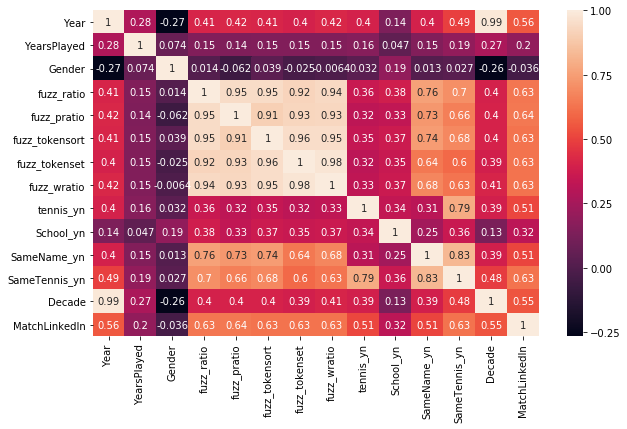

In [122]:
ax = plt.subplots(figsize=(10,6)) 
#corrMatrix = df2.corr()
#corrMatrix = df.corr().drop(['MatchLinkedIn'])
corrMatrix = df.corr()
#corrMatrix = df.corr().drop(['EC_Review','fuzz_wratio', 'fuzz_pratio', 'fuzz_tokensort', 'Decade', 'YearsPlayed']  )
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [123]:
df_cols = df[:0]
df_cols = df_cols.drop(['MatchLinkedIn'], axis = 1 )
#df_cols = df_cols.drop(['EC_Review','fuzz_wratio', 'fuzz_pratio', 'fuzz_tokensort', 'Decade', 'YearsPlayed'] , axis = 1 )
for item1,item2 in sorted(zip(rfc.best_estimator_.named_steps['rfc'].feature_importances_,df_cols.columns),reverse=True):
    print(f'{item2} has a score of {item1}')

fuzz_ratio has a score of 0.15885632725120105
Year has a score of 0.1465743275346953
fuzz_wratio has a score of 0.14605225831138027
fuzz_tokenset has a score of 0.09985602439629016
Decade has a score of 0.09138126234028573
tennis_yn has a score of 0.08029209278577243
SameTennis_yn has a score of 0.07725426638685454
fuzz_pratio has a score of 0.07198631835894365
YearsPlayed has a score of 0.04852864076427084
fuzz_tokensort has a score of 0.04174709710995346
Gender has a score of 0.019035038174614025
School_yn has a score of 0.013107970139486589
SameName_yn has a score of 0.0053283764462519045


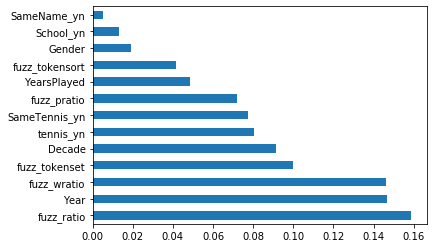

In [125]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_, index=df_cols.columns)
#feat_importances.nlargest(4).plot(kind='barh')
#checking more than 4 because original omission of CASH_IN...should remove FlaggedFraud to see effect
feat_importances.nlargest(15).plot(kind='barh')

In [126]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=10))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None, 10, 30, 50],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['entropy', 'gini']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Model Parameter: {}".format(rfc.best_params_))
print("Model Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rfc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
print("F1 score: ", f1_score(y_test , rfc_predict))
print("Precision score: " , precision_score(y_test , rfc_predict))
print("Recall score: " , recall_score(y_test , rfc_predict))
print (classification_report(y_test , rfc_predict))
rfc

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Model Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'entropy', 'rfc__max_depth': 10}
Model Accuracy: 0.8531073446327684
[[32 12]
 [ 8 66]]
Accuracy score:  0.8305084745762712
F1 score:  0.868421052631579
Precision score:  0.8461538461538461
Recall score:  0.8918918918918919
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        44
         1.0       0.85      0.89      0.87        74

    accuracy                           0.83       118
   macro avg       0.82      0.81      0.82       118
weighted avg       0.83      0.83      0.83       118

CPU times: user 209 ms, sys: 60.2 ms, total: 269 ms
Wall time: 3.85 s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

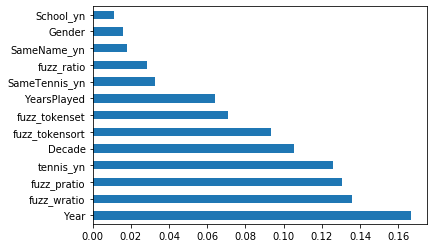

In [90]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_, index=df_cols.columns)
#feat_importances.nlargest(4).plot(kind='barh')
#checking more than 4 because original omission of CASH_IN...should remove FlaggedFraud to see effect
feat_importances.nlargest(15).plot(kind='barh')

In [22]:
#from sklearn.externals import joblib
#joblib.dump(rfc, 'modelmmww.joblib')


In [23]:
rfc_predictX = rfc.predict(X)


In [24]:
len(rfc_predictX)

472

In [25]:
#rfc_predictX

In [26]:
df['prediction'] = rfc_predictX

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
#df

In [28]:
#df1 = df[df['EC_Review']!=df['prediction']]

In [29]:
#len(df1)

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [31]:
#df1

In [32]:
dfm['prediction'] = rfc_predictX

In [33]:
#dfm.info()

In [34]:
cols_to_order = ['MatchLinkedIn','prediction', 'LName', 'SearchResult', 'Year', 'tennis_yn', 'School_yn', 'fuzz_ratio']
new_columns = cols_to_order + (dfm.columns.drop(cols_to_order).tolist())
dfm = dfm[new_columns]

In [35]:
dfm['MatchLinkedIn'].value_counts()

1.00    272
0.00    200
Name: MatchLinkedIn, dtype: int64

In [36]:
dfm['prediction'].value_counts()

1.00    276
0.00    196
Name: prediction, dtype: int64

In [37]:
dfm['PredictMatch'] = dfm['prediction'] == dfm['MatchLinkedIn']
dfm['PredictMatch'].value_counts()

True     444
False     28
Name: PredictMatch, dtype: int64

In [38]:
len(dfm[dfm['MatchLinkedIn'] == dfm['prediction']])

444

In [39]:
len(dfm[dfm['MatchLinkedIn'] != dfm['prediction']])

28

In [40]:
print(len(dfm[(dfm['MatchLinkedIn'] != dfm['prediction']) & (dfm['SameName_yn'] == 1)]))
dfm[(dfm['MatchLinkedIn'] != dfm['prediction']) & (dfm['SameName_yn'] == 1)]

12


,MatchLinkedIn,prediction,LName,SearchResult,Year,tennis_yn,School_yn,fuzz_ratio,Criteria,YearsPlayed,RosterLink,Hometown,HS,ClassYear,College,First,Gender,Last,MidInit,MidName,Name,RosterYear,Headline,Location,Company,School,Activites,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,SameName_yn,SameTennis_yn,Decade,PredictMatch
FirstLast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Craig Finger,1.00,0.00,Craig Finger,https://www.linkedin.com/in/craig-finger-11a14...,1966,0.00,1.00,100.00,Cornell,2,NaN,"Niagara Falls, NY",Niagara Falls HS,['Sophomore' 'Junior'],Cornell University,Craig,1,Finger,NaN,NaN,Craig Finger,"[""1964-65 Men's Tennis Roster"" ""1965-66 Men's ...","President, Retired at DCF HealthTrain, LLC","East Lansing, Michigan","DCF HealthTrain, LLC","['University of Michigan', 'Cornell University']",[],100.00,100.00,100.00,100.00,1.00,1.00,1960,False
Joshua Goldstein,0.00,1.00,Joshua Goldstein,https://www.linkedin.com/in/joshua-goldstein-3...,2009,0.00,1.00,100.00,Cornell,4,https://cornellbigred.com/sports/mens-tennis/r...,"St. Louis, Mo.",Clayton HS,['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Joshua,1,Goldstein,NaN,NaN,Joshua Goldstein,"[""2005-06 Men's Tennis Roster"" ""2006-07 Men's ...",Case Manager at BronxWorks,Greater New York City Area,BronxWorks,['Cornell University'],"['Cornell Public Service Center, Community Par...",100.00,100.00,100.00,100.00,1.00,1.00,2000,False
Jay Kimmel,1.00,0.00,Jay Kimmel,https://www.linkedin.com/in/jay-kimmel-a25545b2/,1978,0.00,1.00,100.00,Cornell,1,NaN,NaN,NaN,NaN,Cornell University,Jay,1,Kimmel,NaN,NaN,NaN,NaN,President Upswing Health and Physician executi...,"Longmeadow, Massachusetts",UpswingHealth,"['Cornell University', 'Temple University', 'C...",[],100.00,100.00,100.00,100.00,1.00,1.00,1970,False
Brian Curtis,0.00,1.00,Brian Curtis,https://www.linkedin.com/in/brian-curtis-83938...,1980,0.00,1.00,100.00,Cornell,4,NaN,NaN,NaN,NaN,Cornell University,Brian,1,Curtis,NaN,NaN,NaN,NaN,Graduate Teaching Assistant at Cornell University,"Macomb, Michigan",Cornell University,"['Cornell University', 'University of Detroit ...",[],100.00,100.00,100.00,100.00,1.00,1.00,1980,False
Aaron Eberhardt,1.00,0.00,Aaron Eberhardt,https://www.linkedin.com/in/aaron-eberhardt-b2...,1994,0.00,1.00,100.00,Cornell,2,NaN,NaN,NaN,NaN,Cornell University,Aaron,1,Eberhardt,NaN,NaN,NaN,NaN,"Owner, Westwood Development Group",Hawaiian Islands,Westwood Development Group,"['Punahou School', 'Cornell University']",[],100.00,100.00,100.00,100.00,1.00,1.00,1990,False
Michelle Wang,0.00,1.00,Michelle Wang,https://www.linkedin.com/in/michellejwang8/,2018,1.00,1.00,100.00,Cornell,3,https://cornellbigred.com/sports/womens-tennis...,"Sammamish, Wash.",Redmond HS,['Freshman' 'Sophomore' 'Junior'],Cornell University,Michelle,0,Wang,NaN,NaN,Michelle Wang,"[""2015-16 Women's Tennis Roster"" ""2016-17 Wome...",Financial Analyst at Microsoft,"Redmond, Washington",SAP,"['Cornell University', 'Redmond High School']","[""Cornell Women's Varsity Tennis, Cornell Cons...",100.00,100.00,100.00,100.00,1.00,2.00,2010,False
Nina Turudic,0.00,1.00,Nina Turudic,https://www.linkedin.com/in/nina-turudic-76986...,2012,0.00,1.00,100.00,Cornell,1,https://cornellbigred.com/sports/womens-tennis...,"Zagreb, Croatia",Zagreb Gymnasium,['Freshman'],Cornell University,Nina,0,Turudic,NaN,NaN,Nina Turudic,"[""2011-12 Women's Tennis Roster""]",Student at Cornell University,"Ithaca, New York",Cornell University,['Cornell University'],[],100.00,100.00,100.00,100.00,1.00,1.00,2010,False
Bette Kirschstein,0.00,1.00,Bette Kirschstein,https://www.linkedin.com/in/bette-kirschstein-...,1979,0.00,1.00,100.00,Cornell,1,NaN,NaN,NaN,NaN,Cornell University,Bette,0,Kirschstein,NaN,NaN,NaN,NaN,"Associate Professor, English at Pace University",Greater New York City Area,Pace University,['Cornell University'],[],100.00,100.00,100.00,100.00,1.00,1.00,1970,False
Sarah Mott,1.00,0.00,Sarah Mott,https://www.linkedin.com/in/sarah-mott-9877a4/,1982,0.00,1.00,1

In [41]:
print(len(dfm[(dfm['MatchLinkedIn'] != dfm['prediction']) & (dfm['SameName_yn'] == 0) ]))
dfm[(dfm['MatchLinkedIn'] != dfm['prediction']) & (dfm['SameName_yn'] == 0)  ]

16


,MatchLinkedIn,prediction,LName,SearchResult,Year,tennis_yn,School_yn,fuzz_ratio,Criteria,YearsPlayed,RosterLink,Hometown,HS,ClassYear,College,First,Gender,Last,MidInit,MidName,Name,RosterYear,Headline,Location,Company,School,Activites,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,SameName_yn,SameTennis_yn,Decade,PredictMatch
FirstLast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charles Thorp,0.00,1.00,Chas Thorp,https://www.linkedin.com/in/chas-thorp-0827881/,1960,0.00,1.00,87.00,Cornell,1,NaN,"Pittsburgh, Pa.",Shady Side A.,['Sophomore'],Cornell University,Charles,1,Thorp,M.,NaN,Charles M. Thorp,"[""1959-60 Men's Tennis Roster""]",Field Scheduler,"San Rafael, California",Marin FC,['Cornell University'],['Rockledge Fraternity'],70.00,87.00,87.00,87.00,0.00,0.00,1960,False
Dan Evett,1.00,0.00,Daniel Evett,https://www.linkedin.com/in/daniel-evett-269aa...,1961,1.00,1.00,86.00,Cornell,1,NaN,"Ithaca, NY",Ithaca HS,['Sophomore'],Cornell University,Dan,1,Evett,H.,NaN,Dan H. Evett,"[""1960-61 Men's Tennis Roster""]",PE Instructor at Cornell University,"Brooktondale, New York",NaN,"['U. of Chicago', 'Cornell University', 'Corne...","['Tennis and Track teams, Symphony Orchestra (...",67.00,86.00,86.00,86.00,0.00,1.00,1960,False
Mark Taylor,0.00,1.00,"Mark Taylor, BS, RN",https://www.linkedin.com/in/mark-taylor-bs-rn-...,1966,0.00,0.00,73.00,Cornell,1,NaN,Washington DC,Wilson HS,['Sophomore'],Cornell University,Mark,1,Taylor,NaN,NaN,Mark Taylor,"[""1965-66 Men's Tennis Roster""]",Registered Nurse - New York Presbyterian Weill...,Greater New York City Area,"Baltic Street AEH, Inc.",['New York University'],"['Vice President, Men Entering Nursing']",100.00,79.00,100.00,90.00,0.00,0.00,1960,False
Alan Yuter,1.00,0.00,ALAN YUTER,https://www.linkedin.com/in/alan-yuter-92341519/,1976,0.00,1.00,30.00,Cornell,2,NaN,NaN,NaN,NaN,Cornell University,Alan,1,Yuter,NaN,NaN,NaN,NaN,Partner at Selman Breitman LLP,"Hermosa Beach, California",Selman Breitman LLP,"['Cornell University', 'Georgetown University ...",[],30.00,100.00,100.00,100.00,0.00,0.00,1970,False
Chuck Poe,1.00,0.00,Charles Poe,https://www.linkedin.com/in/charles-poe-a4911b13/,1983,0.00,1.00,60.00,Cornell,2,NaN,NaN,NaN,NaN,Cornell University,Chuck,1,Poe,NaN,NaN,NaN,NaN,"Managing Partner at Hudson Montana, LLC","Albany, New York Area","BA Construction Services, LLC",['Cornell University'],[],44.00,60.00,60.00,60.00,0.00,0.00,1980,False
Nicole Chiu,0.00,1.00,Nicole Chu,https://www.linkedin.com/in/nicole-chu-54a515109/,2003,0.00,1.00,95.00,Cornell,4,NaN,"Edmonton, Alb.",Harry Ainlay HS,['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Nicole,0,Chiu,NaN,NaN,Nicole Chiu,"[""1999-2000 Women's Tennis Roster"" ""2000-01 Wo...",Research Associate at ADVANO,"New Orleans, Louisiana",ADVANO,"['Cornell University', 'Rutgers University-New...","['Archery, Triathlon, Rock Climbing', 'Triathl...",90.00,95.00,95.00,95.00,0.00,0.00,2000,False
Kelly Molloy,1.00,0.00,Kelly Meyers,https://www.linkedin.com/in/kelly-meyers-391564/,1998,0.00,1.00,67.00,Cornell,4,NaN,"Manlius, N.Y.",New Canaan HS (Conn.),['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Kelly,0,Molloy,NaN,NaN,Kelly Molloy,"[""1994-95 Women's Tennis Roster"" ""1995-96 Wome...","Marketing Director at Novartis Vaccines, Inc",Greater New York City Area,"Novartis Vaccines, Inc","['Cornell University', 'New Canaan High School']",[],67.00,67.00,67.00,67.00,0.00,0.00,1990,False
Wan Chen,0.00,1.00,Wan Yi Chen,https://www.linkedin.com/in/wan-yi-chen-0981b3...,1994,0.00,0.00,84.00,Cornell,4,NaN,"Kissimee, Fla.",Osceola HS,['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Wan,0,Chen,NaN,NaN,Wan Chen,"[""1990-91 Women's Tennis Roster"" ""1991-92 Wome...",Student at Baruch College,"New York, New York",AY Creative Inc.,['Baruch College'],[],62.00,84.00,100.00,95.00,0.00,0.00,1990,False
Paulina Raguz,0.00,1.00,Paulina Raguz Macksoud,https://www.linkedin.com/in/paulina-raguz-mack...,1993,0.00,1.00,74.00,Cornell,1,NaN,"Nairobi, Ke

In [42]:
print(len(dfm[(dfm['MatchLinkedIn'] == dfm['prediction']) & (dfm['SameName_yn'] == 0)]))
dfm[(dfm['MatchLinkedIn'] == dfm['prediction']) & (dfm['SameName_yn'] == 0)]

227


,MatchLinkedIn,prediction,LName,SearchResult,Year,tennis_yn,School_yn,fuzz_ratio,Criteria,YearsPlayed,RosterLink,Hometown,HS,ClassYear,College,First,Gender,Last,MidInit,MidName,Name,RosterYear,Headline,Location,Company,School,Activites,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,SameName_yn,SameTennis_yn,Decade,PredictMatch
FirstLast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alex Kim,1.00,1.00,Alexander Kim,https://www.linkedin.com/in/alexander-kim-3045...,2005,0.00,1.00,76.00,Cornell,1,NaN,"Beaverton, Ore.",Southside HS,['Freshman'],Cornell University,Alex,1,Kim,NaN,NaN,Alex Kim,"[""2004-05 Men's Tennis Roster""]",Programmatic Yield Analyst,"New York, New York",The Daily Beast,['Cornell University School of Hotel Administr...,[],62.00,76.00,76.00,86.00,0.00,0.00,2000,True
Alex Sidney,1.00,1.00,"Alexander Sidney, CFA",https://www.linkedin.com/in/alexander-sidney-c...,2015,1.00,1.00,69.00,Cornell,4,https://cornellbigred.com/sports/mens-tennis/r...,"Baltimore, Md.",McDonogh School,['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Alex,1,Sidney,NaN,NaN,Alex Sidney,"[""2011-12 Men's Tennis Roster"" ""2012-13 Men's ...",Interest Rate Options Trader at Wells Fargo Se...,"Charlotte, North Carolina",J.P. Morgan,"['Cornell University', 'Hanyang University', '...","[""Object-Oriented Programming Consultant, Tuto...",73.00,71.00,71.00,86.00,0.00,1.00,2010,True
Alexander Champion,0.00,0.00,Alexander Wilton,https://www.linkedin.com/in/alexanderwilton/,1962,1.00,1.00,76.00,Cornell,2,NaN,"Dayton, O.",Lawrenceville,['Sophomore' 'Junior'],Cornell University,Alexander,1,Champion,B.,NaN,Alexander B. Champion,"[""1960-61 Men's Tennis Roster"" ""1961-62 Men's ...",Vice President at Morgan Stanley,Hong Kong,Westbrook Partners,"['Cornell University', 'HBX / Harvard Business...","[""Leader of Cornell Varsity Tennis Team; Lead ...",69.00,76.00,76.00,76.00,0.00,1.00,1960,True
Andy Gauthier,1.00,1.00,Andrew Gauthier,https://www.linkedin.com/in/andrewgauthier/,2011,1.00,1.00,86.00,Cornell,4,https://cornellbigred.com/sports/mens-tennis/r...,"Ann Arbor, Mich.",Pioneer HS,['Freshman' 'Sophomore' 'Junior' 'Senior'],Cornell University,Andy,1,Gauthier,NaN,NaN,Andy Gauthier,"[""2007-08 Men's Tennis Roster"" ""2008-09 Men's ...",Principal Mechanical Engineer at Berkshire Grey,"Somerville, Massachusetts",Build-It-Yourself,"['Cornell University', 'Cornell University']","[""Varsity Men's Tennis team, Delta Chi Fratern...",77.00,86.00,86.00,86.00,0.00,1.00,2010,True
Barry Poskanzer,1.00,1.00,"Barry Poskanzer, AIA",https://www.linkedin.com/in/barry-poskanzer-ai...,1966,0.00,1.00,86.00,Cornell,2,NaN,"Teaneck, NJ",Teaneck HS,['Sophomore' 'Junior'],Cornell University,Barry,1,Poskanzer,NaN,NaN,Barry Poskanzer,"[""1964-65 Men's Tennis Roster"" ""1965-66 Men's ...","Partner, Poskanzer Skott Architects",United States,Poskanzer Skott Architects,['Cornell University’s College of Architecture'],[],100.00,88.00,100.00,95.00,0.00,0.00,1960,True
Bernard Carrey,0.00,0.00,Sharon Krevor-Weisbaum,https://www.linkedin.com/in/sharon-krevor-weis...,1960,0.00,1.00,28.00,Cornell,1,NaN,"Teaneck, NJ",Teaneck HS,['Sophomore'],Cornell University,Bernard,1,Carrey,S.,NaN,Bernard S. Carrey,"[""1959-60 Men's Tennis Roster""]","Managing Partner at Brown, Goldstein & Levy, LLP","Baltimore, Maryland Area","Brown, Goldstein & Levy, LLP",['University of Maryland Francis King Carey Sc...,[],36.00,33.00,33.00,32.00,0.00,0.00,1960,True
Bruce Welsh,0.00,0.00,Huibo Shao,https://www.linkedin.com/in/huibo-shao-80078389/,1951,0.00,0.00,29.00,Cornell,1,NaN,"Orlando, Fla.",Asheville,['Senior'],Cornell University,Bruce,1,Welsh,H.,NaN,Bruce H. Welsh,"[""1950-51 Men's Tennis Roster""]","Strategic Advisor, Health Analytics, FedEx Ser...","Germantown, Tennessee",FedEx Services,"['University of Illinois at Urbana-Champaign',...",[],30.00,38.00,38.00,38.00,0.00,0.00,1950,True
C. Warren Haas,1.00,1.00,C Warren Haas,https://www.linkedin.com/in/c-warren-haas-3130...,1953,0.00,1.00,96.00,Cornell,3,NaN,"Readi

In [43]:
print(len(dfm[(dfm['MatchLinkedIn'] == dfm['prediction']) & (dfm['SameName_yn'] == 1)]))
#dfm[(dfm['EC_Review'] == dfm['prediction']) & (dfm['SameName_yn'] == 1)]

217


In [44]:
X.shape

(472, 13)

In [45]:
y.shape

(472,)

In [46]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, Abedin Sham to Winifred Johnson
Data columns (total 35 columns):
MatchLinkedIn     472 non-null float64
prediction        472 non-null float64
LName             472 non-null object
SearchResult      472 non-null object
Year              472 non-null int64
tennis_yn         472 non-null float64
School_yn         472 non-null float64
fuzz_ratio        472 non-null float64
Criteria          472 non-null object
YearsPlayed       472 non-null int64
RosterLink        120 non-null object
Hometown          310 non-null object
HS                308 non-null object
ClassYear         310 non-null object
College           472 non-null object
First             472 non-null object
Gender            472 non-null int64
Last              472 non-null object
MidInit           71 non-null object
MidName           4 non-null object
Name              310 non-null object
RosterYear        310 non-null object
Headline          472 non-null object
Loca

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, Abedin Sham to Winifred Johnson
Data columns (total 15 columns):
Year              472 non-null int64
YearsPlayed       472 non-null int64
Gender            472 non-null int64
fuzz_ratio        472 non-null float64
fuzz_pratio       472 non-null float64
fuzz_tokensort    472 non-null float64
fuzz_tokenset     472 non-null float64
fuzz_wratio       472 non-null float64
tennis_yn         472 non-null float64
School_yn         472 non-null float64
SameName_yn       472 non-null float64
SameTennis_yn     472 non-null float64
Decade            472 non-null int64
MatchLinkedIn     472 non-null float64
prediction        472 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.0+ KB


In [48]:
#df.to_csv('Xdata12_CornellMMWW.csv')